# 📊 Trader Behavior Insights Based on Market Sentiment using Fear & Greed Index



## 📝 Project Overview

This project analyzes the relationship between **Crypto Trader Behavior** and **Market Sentiment** using two key datasets:

- **Historical trading data** from the Hyperliquid platform
- **Bitcoin Market Sentiment Dataset**(Fear Greed Index) which captures market emotions

The goal is to uncover **how sentiment (Fear, Greed, etc.) influences trading actions** — such as buying/selling, trade size, and profitability. By combining real-world trading logs with sentiment indicators, we aim to draw actionable insights that can enhance decision-making for traders and platforms alike.



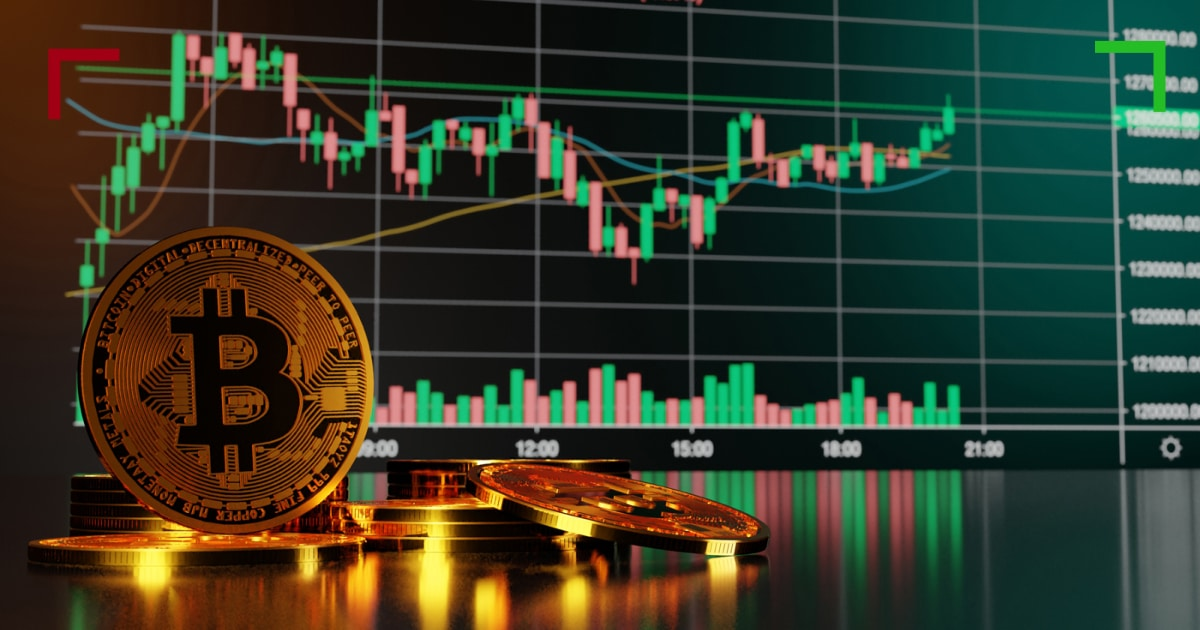

## 🎯 Project Goals/Objectives

- 🔍 Analyze trader performance (profit/loss) under different market sentiments  
- 📊 Understand behavioral trends: Do people trade differently during Fear vs. Greed?  
- 💸 Study trade size, direction (Buy/Sell), and risk patterns based on sentiment  
- 📈 Generate data-driven insights to improve trading strategy or platform features


## 📂 Data Sources

Datasets:                 
                                                
fear_greed_index.csv - Contains daily market sentiment labels (Fear, Greed, etc.) and numeric sentiment score
historical_data.csv - Contains over 2 lakh trades, including execution price, side, size, PnL, and time


## 🧾 Key Columns Description

Before importing the data, here's a quick explanation of the most important columns from each dataset.

### 📁 A. Fear & Greed Index Dataset (fear_greed_index.csv)
Column_Name	- Description

*Date* -	Date of the sentiment record (used to join with trade data)

*value*	- Numeric sentiment score (0 = extreme fear, 100 = extreme greed)

*classification*	- Market mood label (e.g., Fear, Greed, Extreme Fear, etc.)

timestamp	- Unix timestamp for internal tracking (not used in this analysis)




### 📁 B. Historical Trader Dataset (historical_data.csv)
Column_Name	- Description

*Account*	- Unique ID representing a trader

*Coin*	- Symbol of the cryptocurrency traded (e.g., BTC, ETH)

*Execution Price*	- Price at which the trade was executed

*Size Tokens*	- Quantity of tokens involved in the trade

*Size USD*	- Total trade value in USD

*Side*	- Type of trade: BUY or SELL

*Timestamp IST*	- Trade execution time in Indian Standard Time (used to extract date)

*Start Position*	- Trader’s position (holding size) before executing this trade

*Direction*	- Additional label of trade type (Buy/Sell)

*Closed PnL*	- Profit or loss from the trade (key performance metric)

*Fee*	- Transaction fee paid for this trade


These columns are essential for analyzing how trading behavior and outcomes vary under different emotional states of the market.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [2]:
import pandas as pd

# Load Fear & Greed index data
fear_greed_df = pd.read_csv("fear_greed_index.csv")
fear_greed_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
# Load Historical Trader Data
historical_df = pd.read_csv("historical_data.csv")
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## 🧼 Data Cleaning & Preparation

To ensure smooth analysis, clean and preprocess both datasets through the following steps:


### 🔄 A. Rename Columns

Rename selected columns in the historical trader data to remove spaces and ensure naming consistency.

Original Column Name - Renamed To  

Execution Price : execution_price

Size Tokens : size_tokens

Size USD : size_usd

Closed PnL : closed_pnl

Start Position : start_position  

Timestamp IST : timestamp

Transaction Hash : transaction_hash

In [4]:
#check columns
historical_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [5]:
#check for null values

historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


There are no null values

In [7]:
# Rename columns in historical data

new_col = {
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Closed PnL": "closed_pnl",
    "Start Position": "start_position",
    "Timestamp IST": "timestamp",
    "Transaction Hash": "transaction_hash"
}
historical_df.rename(columns=new_col, inplace=True)

### 🧹 B. Remove Unnecessary Columns

Drop columns that were not useful for our analysis or were redundant:

- From fear_greed_index.csv:  
  - timestamp (duplicate of date)

- From historical_data.csv:  
  - transaction_hash, Order ID, Trade ID, Timestamp (technical metadata)


In [8]:
historical_df.head()

,Account,Coin,execution_price,size_tokens,size_usd,Side,timestamp,start_position,Direction,closed_pnl,transaction_hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
# Drop unnecessary columns

historical_df.drop(columns=["transaction_hash", "Order ID", "Trade ID", "Timestamp"], inplace=True)

fear_greed_df.drop(columns=["timestamp","value"], inplace=True)


In [11]:
historical_df.columns

Index(['Account', 'Coin', 'execution_price', 'size_tokens', 'size_usd', 'Side',
       'timestamp', 'start_position', 'Direction', 'closed_pnl', 'Crossed',
       'Fee'],
      dtype='object')

In [12]:
fear_greed_df.columns

Index(['classification', 'date'], dtype='object')

### 🕒 C. Convert and Extract Dates

- Converte *timestamp* in historical data to proper datetime format
- Extracted only the **date** component
- Ensured both datasets used the same `date` column for merging


In [13]:
historical_df.dtypes

,0
Account,object
Coin,object
execution_price,float64
size_tokens,float64
size_usd,float64
Side,object
timestamp,object
start_position,float64
Direction,object
closed_pnl,float64


In [14]:
fear_greed_df.dtypes

,0
classification,object
date,object


We can observe that 'timestamp' column in historical_df and 'date' column in fear_greed_df is in object,we need to change to datetime datatype, as it will be useful in data analysis.

In [15]:
historical_df.head()

,Account,Coin,execution_price,size_tokens,size_usd,Side,timestamp,start_position,Direction,closed_pnl,Crossed,Fee
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055


In [16]:
# Convert timestamp column to datetime and extract only date part

historical_df['date']=pd.to_datetime(historical_df['timestamp'],format = "%d-%m-%Y %H:%M").dt.date
historical_df.dtypes

,0
Account,object
Coin,object
execution_price,float64
size_tokens,float64
size_usd,float64
Side,object
timestamp,object
start_position,float64
Direction,object
closed_pnl,float64


As we have used '.dt.date' ,it is converted to object

In [17]:
historical_df['date']

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
211219,2025-04-25
211220,2025-04-25
211221,2025-04-25
211222,2025-04-25


In [18]:
# Reconvert to datetime format

historical_df['date'] = pd.to_datetime(historical_df['date'])
historical_df.dtypes


,0
Account,object
Coin,object
execution_price,float64
size_tokens,float64
size_usd,float64
Side,object
timestamp,object
start_position,float64
Direction,object
closed_pnl,float64


In [19]:
# Convert date in fear/greed index to datetime

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df.dtypes

,0
classification,object
date,datetime64[ns]


In [20]:
historical_df['date'].head()

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02


In [21]:
fear_greed_df['date'].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [22]:
#remove timestamp column as we have created date column seperately extracting only date from it

historical_cleaned_df = historical_df.drop(columns=["timestamp"])
historical_cleaned_df.columns

Index(['Account', 'Coin', 'execution_price', 'size_tokens', 'size_usd', 'Side',
       'start_position', 'Direction', 'closed_pnl', 'Crossed', 'Fee', 'date'],
      dtype='object')

In [23]:
historical_cleaned_df.head()

,Account,Coin,execution_price,size_tokens,size_usd,Side,start_position,Direction,closed_pnl,Crossed,Fee,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-12-02


In [24]:
fear_greed_df.head()

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02
2,Fear,2018-02-03
3,Extreme Fear,2018-02-04
4,Extreme Fear,2018-02-05


## 🔗 Merging Datasets

Now that both datasets are cleaned and date-aligned, we merge them to combine:

- **Historical trader activity**  
- With corresponding **market sentiment** (Fear/Greed) for each day

This allows us to study how trader behavior changes based on the emotional state of the crypto market.


- We use the date column from both datasets
- A **left join** ensures that all trades are kept, even if sentiment is missing for a few dates


In [25]:
merged_df = pd.merge(historical_cleaned_df,fear_greed_df,how='left',on='date')
merged_df.head()

,Account,Coin,execution_price,size_tokens,size_usd,Side,start_position,Direction,closed_pnl,Crossed,Fee,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-12-02,Extreme Greed


In [26]:
merged_df[['date','closed_pnl','Side','size_usd','classification']].head()

,date,closed_pnl,Side,size_usd,classification
0,2024-12-02,0.0,BUY,7872.16,Extreme Greed
1,2024-12-02,0.0,BUY,127.68,Extreme Greed
2,2024-12-02,0.0,BUY,1150.63,Extreme Greed
3,2024-12-02,0.0,BUY,1142.04,Extreme Greed
4,2024-12-02,0.0,BUY,69.75,Extreme Greed


In [39]:
# Save merged dataset

merged_df.to_csv("merged_trader_sentiment.csv", index=False)


## 📊 Exploratory Data Analysis (EDA)

The goal of this step is to uncover behavioral patterns in trading activity under different **market sentiments** (e.g., Fear, Greed, Extreme Fear).

We’ll explore:

- Number of trades per sentiment
- Average profit/loss (`closed_pnl`) by sentiment
- Average trade size (`size_usd`) by sentiment
- Side of trade (BUY/SELL) distribution by sentiment

###  A. Trade Count by Sentiment

We start by checking how trades are distributed across different market moods.

In [27]:
trade_counts = merged_df["classification"].value_counts(dropna=False).reset_index()
trade_counts

,classification,count
0,Fear,61837
1,Greed,50303
2,Extreme Greed,39992
3,Neutral,37686
4,Extreme Fear,21400
5,NaN,6


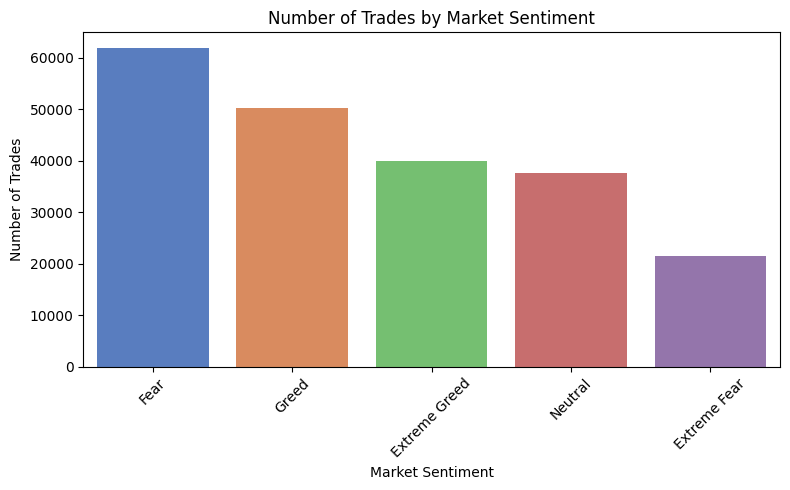

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=trade_counts, x="classification", y="count", hue="classification", palette="muted", legend=False)
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("trade_count_vs_sentiment.png", bbox_inches="tight")

plt.show()




We analyzed how trades were distributed across different market sentiment classifications using the merged dataset. Here's what we observed:

* The majority of trades occurred on Fear and Greed days, so we can say that these are the most common emotional states in the crypto market.

* Extreme Fear and Extreme Greed days had fewer trades in comparison, but still a significant amount — possibly indicating market hesitation or high-risk behavior.

* A small number of trades (6 rows) had NaN in the classification column. This means the corresponding sentiment data was not available for those trade dates, which is acceptable and negligible in volume.



### B. Average Profit/Loss by Sentiment

This shows whether traders tend to earn more during Fear or Greed days.

In [29]:
avg_pnl = merged_df.groupby("classification")["closed_pnl"].mean().sort_values(ascending=False).reset_index()
avg_pnl

,classification,closed_pnl
0,Extreme Greed,67.892861
1,Fear,54.290400
2,Greed,42.743559
3,Extreme Fear,34.537862
4,Neutral,34.307718


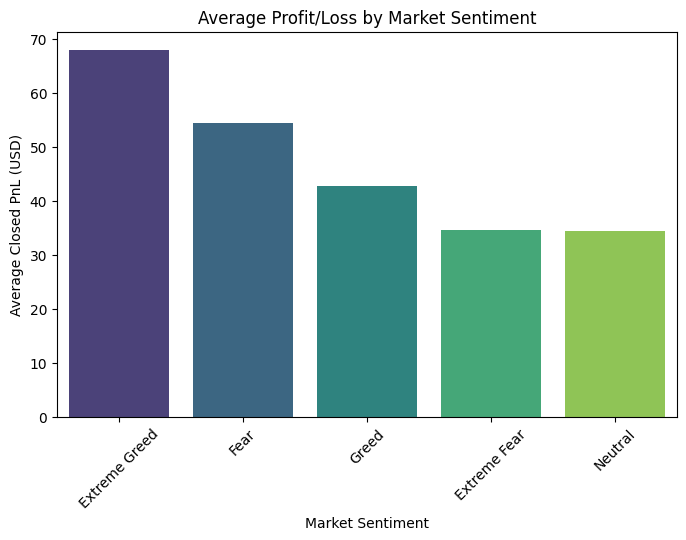

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_pnl, x="classification", y="closed_pnl",hue = "classification",palette="viridis",legend=False)
plt.title("Average Profit/Loss by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL (USD)")
plt.xticks(rotation=45)

plt.savefig("pnl_vs_sentiment.png", bbox_inches="tight")

plt.show()


The results show that traders tend to perform best on **Extreme Greed** and **Fear** days, while **Neutral** and **Extreme Fear** days have the lowest average profits.


### 📌 Key Insights:

🟢 On Extreme Greed days, traders made the most profit. This might be because the market is going up and many people are buying — so it's easier to make money.

😬 On Fear days, traders also did pretty well. This could mean some smart traders are buying when others are scared — and getting good deals.

🔴 On Neutral and Extreme Fear days, profits were much lower. This may be because people are either confused (in neutral markets) or panicking (in fear), leading to rushed or bad trades.


This shows that how well traders do — and the way they trade — changes a lot depending on the mood of the market. When people are scared or excited, it clearly affects their decisions and results.


Therefore,we can say that trader behavior and success varies significantly based on emotional market conditions.

### 📌 C. Average Trade Size (USD) by Sentiment

Helps us understand risk appetite — are traders spending more on Greed days?


In [31]:
avg_size = merged_df.groupby("classification")["size_usd"].mean().sort_values(ascending=False).reset_index()
avg_size

,classification,size_usd
0,Fear,7816.109931
1,Greed,5736.884375
2,Extreme Fear,5349.731843
3,Neutral,4782.732661
4,Extreme Greed,3112.251565


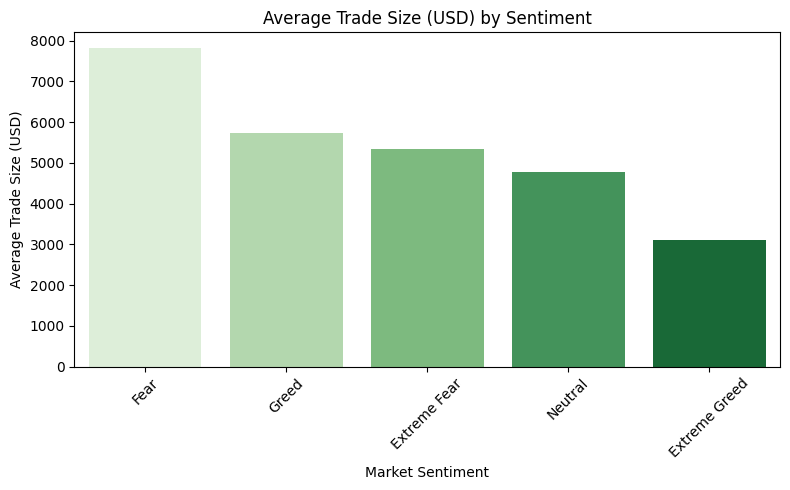

In [41]:

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_size, x="classification", y="size_usd",hue = "classification",palette = "Greens",legend=False)
plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("trade_size_vs_sentiment.png", bbox_inches="tight")

plt.show()


After analysing,we can say that 🇰

- 😨 **On Fear days**, traders were making **the biggest trades**. This could mean experienced traders were stepping in when others were scared.
- 😬 **Even on Extreme Fear days**, traders were spending a good amount.
- 🟡 **On Neutral days**, trade sizes were smaller, possibly because the market felt slow or uncertain.
- 🤑 **Surprisingly, on Extreme Greed days**, people made **smaller trades**. This might mean they were more cautious or just locking in quick profits.

So overall, traders seem to **spend more when the market looks scary** — and **hold back when it’s overconfident**.










### D. BUY vs SELL Trade Counts per Sentiment

We analyze how trader choices shift across emotions.

In [33]:
buy_sell_counts = merged_df.groupby("classification")["Side"].value_counts().unstack().reset_index()
buy_sell_counts

Side,classification,BUY,SELL
0,Extreme Fear,10935,10465
1,Extreme Greed,17940,22052
2,Fear,30270,31567
3,Greed,24576,25727
4,Neutral,18969,18717


In [34]:
buy_sell_counts_plot = merged_df.groupby("classification")["Side"].value_counts().reset_index()
buy_sell_counts_plot

,classification,Side,count
0,Extreme Fear,BUY,10935
1,Extreme Fear,SELL,10465
2,Extreme Greed,SELL,22052
3,Extreme Greed,BUY,17940
4,Fear,SELL,31567
5,Fear,BUY,30270
6,Greed,SELL,25727
7,Greed,BUY,24576
8,Neutral,BUY,18969
9,Neutral,SELL,18717


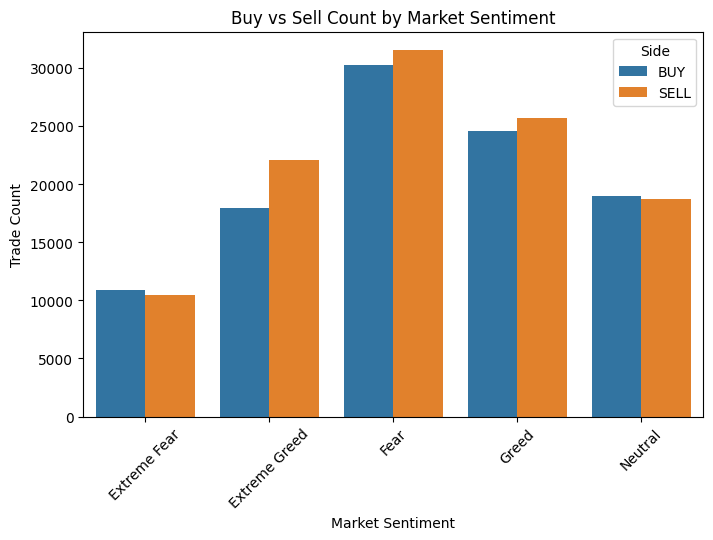

In [42]:
# Plot

plt.figure(figsize=(8, 5))
sns.barplot(data=buy_sell_counts_plot, x="classification", y="count", hue="Side")

plt.title("Buy vs Sell Count by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")

plt.xticks(rotation=45)

plt.savefig("bull_sell_vs_sentiment.png", bbox_inches="tight")

plt.show()


## 🧠 Insights & Interpretation

We looked at how people trade and make profits depending on the mood of the market (Fear, Greed, etc.). Here's what found:

---

### Profit Trends

- **People made the most money on Extreme Greed days** — probably because prices were going up and they took smart, small trades.
-  **Even on Fear days**, traders did pretty well — maybe because they took advantage when others were scared.
-  **On Neutral and Extreme Fear days**, profits were lower — likely because people were confused or rushed into bad trades.

---

###  Trade Size

-  **Traders spent the most money on trades during Fear** — showing they were willing to take big risks when the market was down.
-  **On Extreme Greed days**, trades were smaller — maybe because people wanted quick profits or were playing it safe.
-  **Neutral days** had average-sized trades, likely because there was no clear signal on what to do.

---

###  Number of Trades

-  **Most trades happened on Fear and Greed days** — emotions were running high, so more people were active.
-  **Fewer trades were done on Neutral or Extreme Fear days** — showing hesitation or lack of direction.

---

###  Buy vs Sell

-  **Buy trades were more common overall**, especially when people were optimistic (Greed).
-  But on Extreme Fear days, **more people sold**, likely due to panic or loss of confidence.
-  Emotions clearly influenced whether people decided to buy or sell.

---

###  Simple Takeaway:

People don’t always trade based on logic — **emotions play a big role**. When the market feels scary or exciting, it affects how much they trade, whether they buy or sell, and how much they earn.


## 🔍 Uncovering Hidden Patterns

Beyond basic performance metrics, the data reveals subtle and important behavioral patterns among traders that are influenced by market emotions:

---

### 🧠 Key Hidden Patterns

- 🤑 **On Extreme Greed days**, traders made the **highest profits** using the **smallest trade sizes**, suggesting disciplined profit-taking or cautious optimism.
  
- 😨 **On Fear days**, traders placed the **largest trades** and still earned high profits — indicating that skilled traders may see fear as an opportunity to buy big.

- ⚔️ **Extreme Fear days saw a spike in SELL trades**, pointing to emotional or panic-driven exits rather than strategic selling.

- 😐 **Neutral sentiment** had the **lowest average profits and activity**, implying uncertainty or lack of motivation to trade in low-volatility environments.

- 📈 **BUY trades dominated** most sentiments — except Extreme Fear — reinforcing that most traders lean bullish unless confidence is shaken.

---

These patterns suggest that trading behavior isn't just about logic or strategy — it's often driven by **emotions, timing, and psychology**. Recognizing these trends can help traders and platforms **make smarter decisions**, especially during emotional market shifts.


## 💡 Smart Strategy Recommendations

Based on the trading data and market moods, here are some practical suggestions to help traders make better decisions:

---

### ✅ 1. Don’t Be Afraid of Fear Days  
Traders actually made **good profits on Fear days**, often placing **larger trades**.  
This shows that smart traders use fear as a chance to buy low.  
**Tip:** If the market is down and everyone is scared, that might be your chance — not a time to panic.

---

### ✅ 2. Small Trades Can Still Win  
On **Extreme Greed days**, traders made **the most profit** using **the smallest trades**.  
 You don’t always need big money to make good returns.  
 **Tip:** Be precise and smart — not just aggressive — when the market is too excited.

---

### ✅ 3. Watch Out for Panic Selling  
On **Extreme Fear days**, a lot of people sold quickly — and average profits were low.  
 Panic selling often leads to losses.  
**Tip:** Try to avoid emotional decisions. Take a moment before you sell in fear.

---

### ✅ 4. Neutral Days = Play Safe  
On days when the market wasn’t feeling strongly (Neutral), profits were low and trades were fewer.  
 **Tip:** If the market feels flat, don’t force a trade. Be patient.

---

### ✅ 5. Use Sentiment to Plan Your Trades  
Understanding the **market mood (Fear, Greed, etc.)** can give you an edge.  
**Tip:** Plan your strategies based on what most people are likely thinking and doing — then do it better.

---

These small mindset shifts and strategy tweaks — based on real data — can help traders make **more confident, less emotional decisions**.


## 🏁 Conclusion

In this project, we explored how crypto trader behavior changes based on market sentiment using real-world trading data and the Fear & Greed Index.

We uncovered:
- Strong links between trader profits and market moods
- Emotional patterns influencing trade size and direction
- Practical strategies that traders can use to improve decisions

This analysis highlights how combining trader data with sentiment metrics can give meaningful insights into market behavior and help build smarter trading strategies — especially in emotionally driven environments like crypto.
